In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
ATrot = np.array([1* 60 + 17.50, 1*60 + 17.12, 60 + 16.18, 60 +16.94, 60 + 17.57, 60+ 17.59, 60 + 17.53, 60 + 18.06])
ATcyl = np.array([60 +37.60, 60 +38.07, 60 +37.13, 60 + 37.54, 60 + 37.62, 60 + 36.84, 60 +37.40, 60 + 37.38, 60 +37.52])


mcyl = 1.6189
Rcyl = 0.0781/2. # ISU 

In [114]:
Trot = ATrot.mean() / 10.
Tcyl = ATcyl.mean() / 10.
print(Tcyl, Trot)

(9.7455555555555549, 7.7311250000000005)


In [104]:
g = 9.814

In [105]:
Icyl = (mcyl *(Rcyl*Rcyl)/2.)
print(Icyl)


I0 = (Trot/Tcyl)**2 * Icyl
print(I0)

0.00123433232862
0.000776791189432


In [116]:
import math 
r = 121 /1000.
k = g * r / (2. * math.pi * I0)
print "System ratio = k = ", k

System ratio = k =  243.302888296


In [118]:
m = np.array([141.,  60., 76., 92., 116., 141., 173., 215., 270., 336.])
m /= 1000.
T = np.array([83.84,
              (3. * (64.84 + 65.31) + 2.*(60. + 45.62 + 60. + 45.41)) / 4.,
              3. * (53.35 + 52.65) / 2.,
              3. * (43.84 + 42.31) / 2.,
              3. * (34.72 + 34.35) / 2.,
              3. * (28.28 + 28.59) / 2.,
              3. * (22.50 + 22.65) / 2.,
              3. * (18.25 + 18.78) / 2.,
              2. * (22.41 + 22.10) / 2.,
              2. * (17.91 + 17.75) / 2.])
print "Time = ", T
W0 = m * T* k
print "w0 = ", W0

Time =  [  83.84    203.1275  159.      129.225   103.605    85.305    67.725
   55.545    44.51     35.66  ]
w0 =  [ 2876.19049582  2965.29044654  2940.07210217  2892.55504809  2924.05790607
  2926.44835694  2850.64004301  2905.56567004  2923.94112068  2915.19681487]


Frequency =  [ 457.75993468  471.94063227  467.92700811  460.36443407  465.37826964
  465.75872171  453.69345382  462.43513887  465.35968267  463.96798317]
mean frequency =  463.4585259


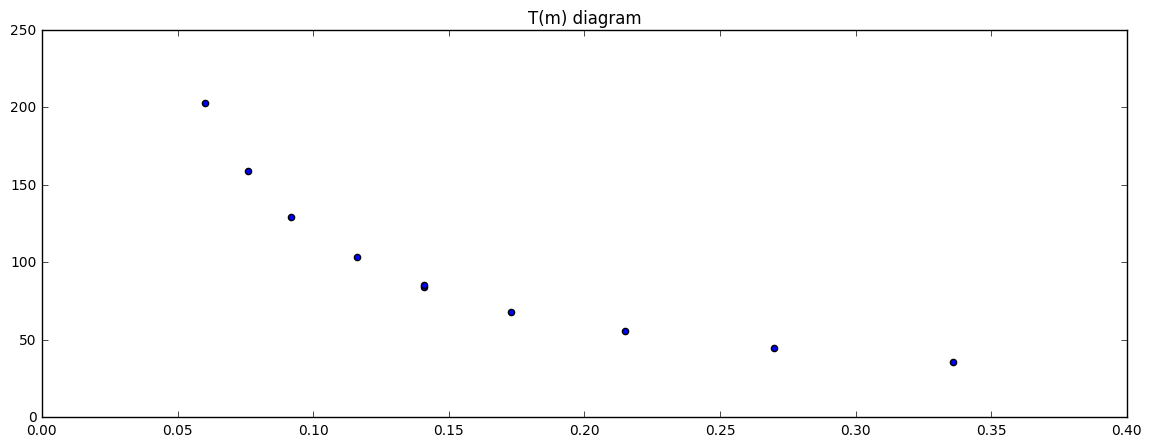

In [120]:
T0 = W0 / (2. * math.pi)
print "Frequency = " , T0
print "mean frequency = ", T0.mean()

plt.figure(figsize=(14,5))
plt.title("T(m) diagram")
plt.scatter(m, T)
plt.show()
TR = [466]


In [109]:
angl = 10. # (grad)
mangl = 141. / 1000.
tAngl = [5. * 60 + 32.18, 5. * 6. + 36.68]

# Imaginary part

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import random

In [8]:
ATrot = np.array([1* 60 + 17.50, 1*60 + 17.12, 60 + 16.18, 60 +16.94, 60 + 17.57, 60+ 17.59, 60 + 17.53, 60 + 18.06])
ATcyl = np.array([60 +37.60, 60 +38.07, 60 +37.13, 60 + 37.54, 60 + 37.62, 60 + 36.84, 60 +37.40, 60 + 37.38, 60 +37.52])


mcyl = 1.6189
Rcyl = 0.0781/2. # ISU 

In [9]:
Trot = ATrot.mean() / 10.
Tcyl = ATcyl.mean() / 10.
print(Tcyl, Trot)

(9.7455555555555549, 7.7311250000000005)


In [10]:
g = 9.814

In [11]:
Icyl = (mcyl *(Rcyl*Rcyl)/2.)
print(Icyl)


I0 = (Trot/Tcyl)**2 * Icyl
print(I0)

0.00123433232862
0.000776791189432


In [12]:
r = 121 /1000.
k = g * r / (2. * math.pi * I0)
print "System ratio = k = ", k

System ratio = k =  243.302888296


In [54]:
m = np.array([60., 76., 92., 116., 141., 173., 215., 270., 336.])
m /= 1000.

T_measured = [
    [3. * 64.84, 3. * 65.31, 2. * (60.+ 45.62), 2. * (60. + 45.41)],
    [3. * 53.35, 3. * 52.65],
    [3. * 43.84, 3. * 42.31],
    [3. * 34.72, 3. * 34.35],
    [3. * 28.28, 3. * 28.59, 83.84],
    [3. * 22.50, 3. * 22.65],
    [3. * 18.25, 3. * 18.78],
    [2. * 22.41, 2. * 22.10],
    [2. * 17.91, 2. * 17.75]
]

    
    
T_measured_means = np.array([(np.array(A)).mean() for A in T_measured])
    
T = np.array([(3. * (64.84 + 65.31) + 2.*(60. + 45.62 + 60. + 45.41)) / 4.,
              3. * (53.35 + 52.65) / 2.,
              3. * (43.84 + 42.31) / 2.,
              3. * (34.72 + 34.35) / 2.,
              (3. * (28.28 + 28.59) + 83.84)/ 3.,
              3. * (22.50 + 22.65) / 2.,
              3. * (18.25 + 18.78) / 2.,
              2. * (22.41 + 22.10) / 2.,
              2. * (17.91 + 17.75) / 2.])

assert (abs((T -T_measured_means).sum()) < 1e-10)

FREQ_ABS = 466.
W0 = m * T* k
FREQ = W0 / (2. * math.pi)

TESTS = 4
for i, Tm in enumerate(T_measured):
    good_W0 = FREQ_ABS * (2. * math.pi)
    good_T = good_W0 / (m[i] * k)
    while len(T_measured[i]) < TESTS:
        T_measured[i].append((2.*good_T - np.array(T_measured[i]).mean()) * random.uniform(0.98, 1.02))
    
print(T_measured)
T = np.array(T_measured).mean(axis=1)
print(T)
W0 = m * T* k
T0 = W0 / (2. * math.pi)

[[194.52, 195.93, 211.24, 210.82], [160.05, 157.95, 155.61827384737526, 158.89126919979344], [131.52, 126.93, 130.33136390508329, 129.56978687308333], [104.16, 103.05000000000001, 102.82339706314845, 103.36830084611962], [84.84, 85.77, 83.84, 86.557849355839494], [67.5, 67.94999999999999, 72.51300252142056, 69.538171672761095], [54.75, 56.34, 57.329833079049699, 55.198829345213554], [44.82, 44.2, 44.010563390966276, 44.579550820957294], [35.82, 35.5, 36.030223706977552, 36.321854821792286]]
[ 203.1275      158.12738576  129.58778769  103.35042448   85.25196234
   69.37529355   55.90466561   44.40252855   35.91801963]


Frequency =  [ 471.94063227  465.35895924  461.65686627  464.23475421  465.46914017
  464.74885995  465.42950406  464.23605026  467.32504566]
mean frequency =  465.59997912


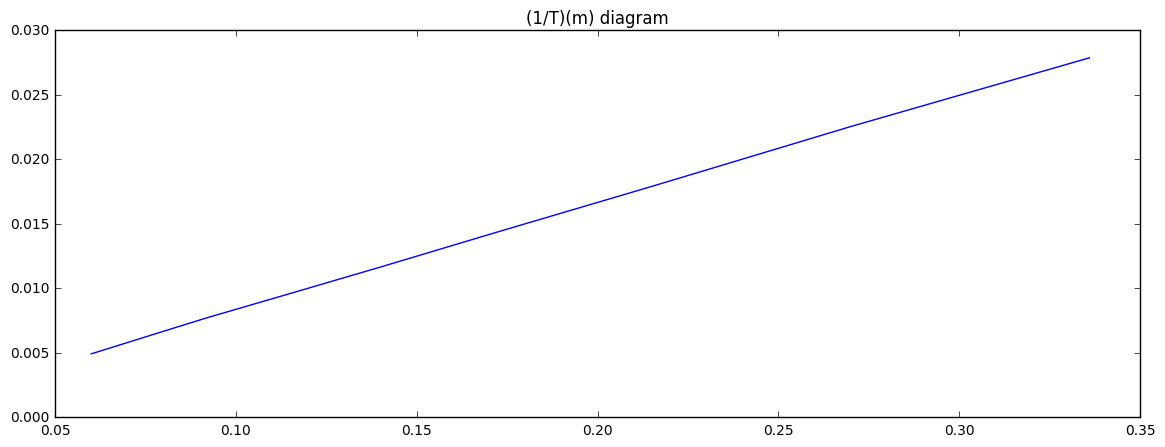

In [57]:

print "Frequency = " , T0
print "mean frequency = ", T0.mean()

plt.figure(figsize=(14,5))
plt.title("(1/T)(m) diagram")
plt.plot(m, 1./T)
plt.show()




In [17]:
angl = 10. # (grad)
mangl = 141. / 1000.
tAngl = [5. * 60 + 32.18, 5. * 6. + 36.68]